In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Problem statement is predicting how many bikes will be required at each hour of any day so to optimize the deployability and increase the consumer experience and how the observed factors influence the Bike demand depending on time and weather and other attributes as below:
-Date : year-month-day
-Rented Bike count - Count of bikes rented at each hour
-Hour - Hour of he day
-Temperature-Temperature in Celsius
-Humidity - %
-Windspeed - m/s
-Visibility - 10m
-Dew point temperature - Celsius
-Solar radiation - MJ/m2
-Rainfall - mm
-Snowfall - cm
-Seasons - Winter, Spring, Summer, Autumn
-Holiday - Holiday/No holiday
-Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## Data Manipulation <a class="anchor" id="sec1"></a>

### Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
#imported different libraries where we will be working with.

In [3]:
pd.set_option("display.max_rows", 100, "display.max_columns", 100)

### Importing dataset <a class="anchor" id="sec1.1"></a>

In [4]:
df=pd.read_csv('/content/drive/MyDrive/DataScience Projects/SeoulBikeData.csv',encoding= 'unicode_escape',parse_dates=[0])

### Dataset View <a class="anchor" id="sec1.2"></a>

In [5]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Information <a class="anchor" id="sec1.3"></a>

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">It can be observed that<br>
    *One feature is in <b>Date</b> type.<br>
    *Four Features are in <b>integer</b> data types.<br>
    *Six Features are in <b>float</b> data types.<br>
    *Three Features are in <b>object</b> data types</p>
</html>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [7]:
df=df.astype({'Rented Bike Count':'float','Hour':'object'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   float64       
 2   Hour                       8760 non-null   object        
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [9]:
df=df.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

### Summary Statistics <a class="anchor" id="sec1.4"></a>

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Brief Information of different descriptive statistics-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    *<b>Measures of Frequency</b>              :- Count, Percent, Frequency.<br>
    *<b>Measures of Central Tendency</b>       :- Mean, Median, and Mode.<br>
    *<b>Measures of Dispersion or Variation</b>:- Range(min,max),Variance, Standard Deviation.<br>
    *<b>Measures of Position</b>               :- Percentile Ranks, Quartile Ranks.</p>
</html>

In [10]:
df.describe()

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Checking for unique values in all attribute <a class="anchor" id="sec1.5"></a>

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">Different numbers of distint values in each attribute.our target varibale is Rented Bike Count.</p>
</html>

In [11]:
df.nunique()

Date                      365
Rented Bike Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind speed                 65
Visibility               1789
Dew point temperature     556
Radiation                 345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning Day             2
dtype: int64

### Checking for missing values in each column <a class="anchor" id="sec1.6"></a>

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">No such missing values in our dataset.<br>
</a></p>
</html>

In [12]:
df.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Radiation                0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

## Data Visualization <a class="anchor" id="sec2"></a>

### Bar Plot <a class="anchor" id="sec2.7"></a>

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">Here we can look at each plot and see the hours wise data distribution.</p>
</html>

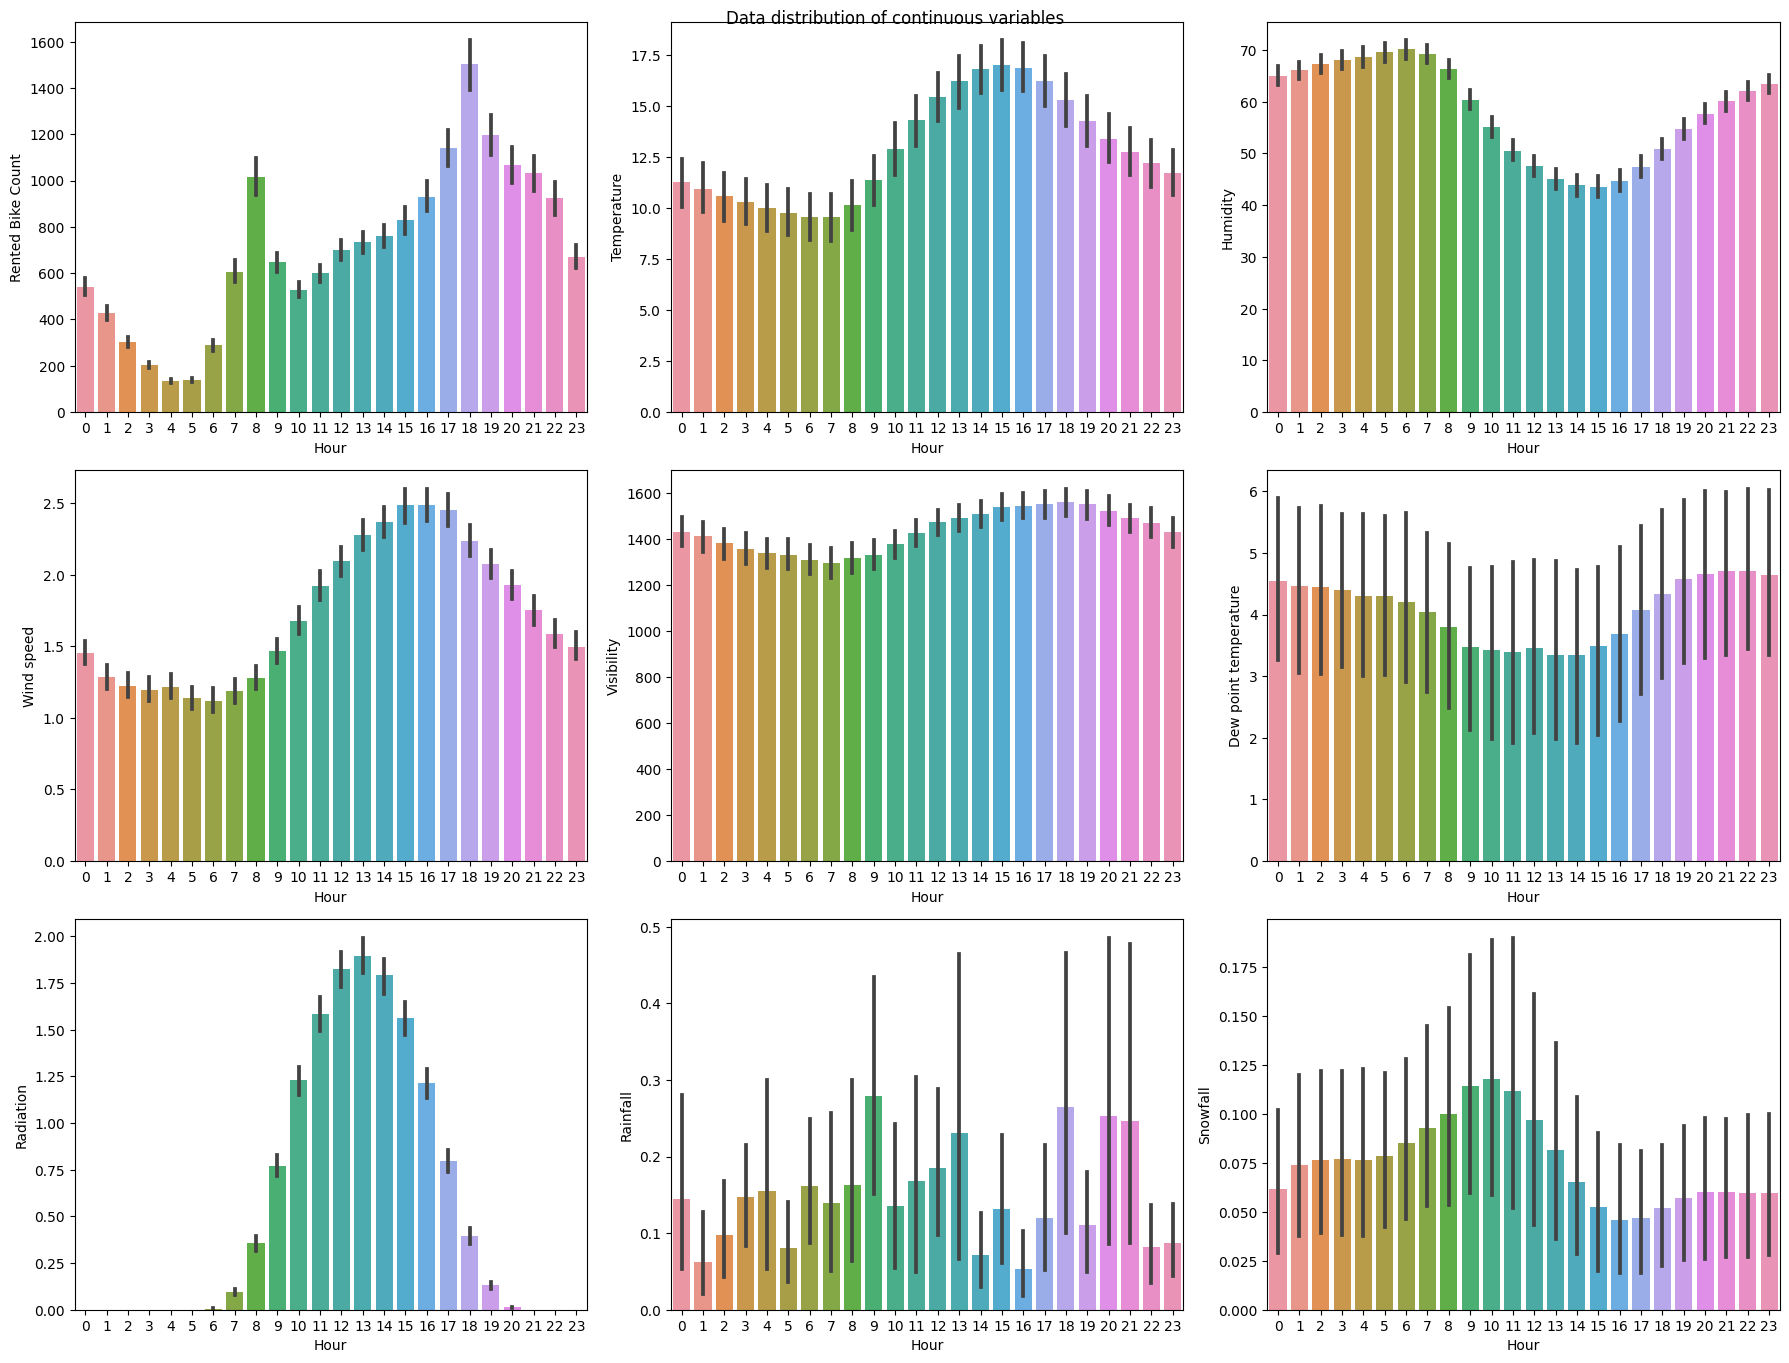

In [13]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int']).columns):
    #plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.barplot(data=df,x='Hour', y=col, ax=ax)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

### Checking the data distribution of each Continuous variable  <a class="anchor" id="sec2.2"></a>

<html>
    <b>What is skewed distribution?</b><br>
    If one tail is longer than another, the distribution is skewed. These distributions are sometimes called asymmetric or asymmetrical distributions as they don’t show any kind of symmetry. Symmetry means that one half of the distribution is a mirror image of the other half. For example, the normal distribution is a symmetric distribution with no skew. The tails are exactly the same.<br>
    <b>Left Skewed or Negatively Skewed</b>:- A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions.(Mean&lt;Median&lt;Mode)<br>
    <b>Right Skewed or Positively Skewed</b>:-A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions.(Mean&gt;Median&gt;Mode)<br>
    <b>Symmetric Distribution:-</b>A symmetric distribution is a type of distribution where the left side of the distribution mirrors the right side(Mean=Median=Mode).ex-Normal Distribution
    </p>
</html>

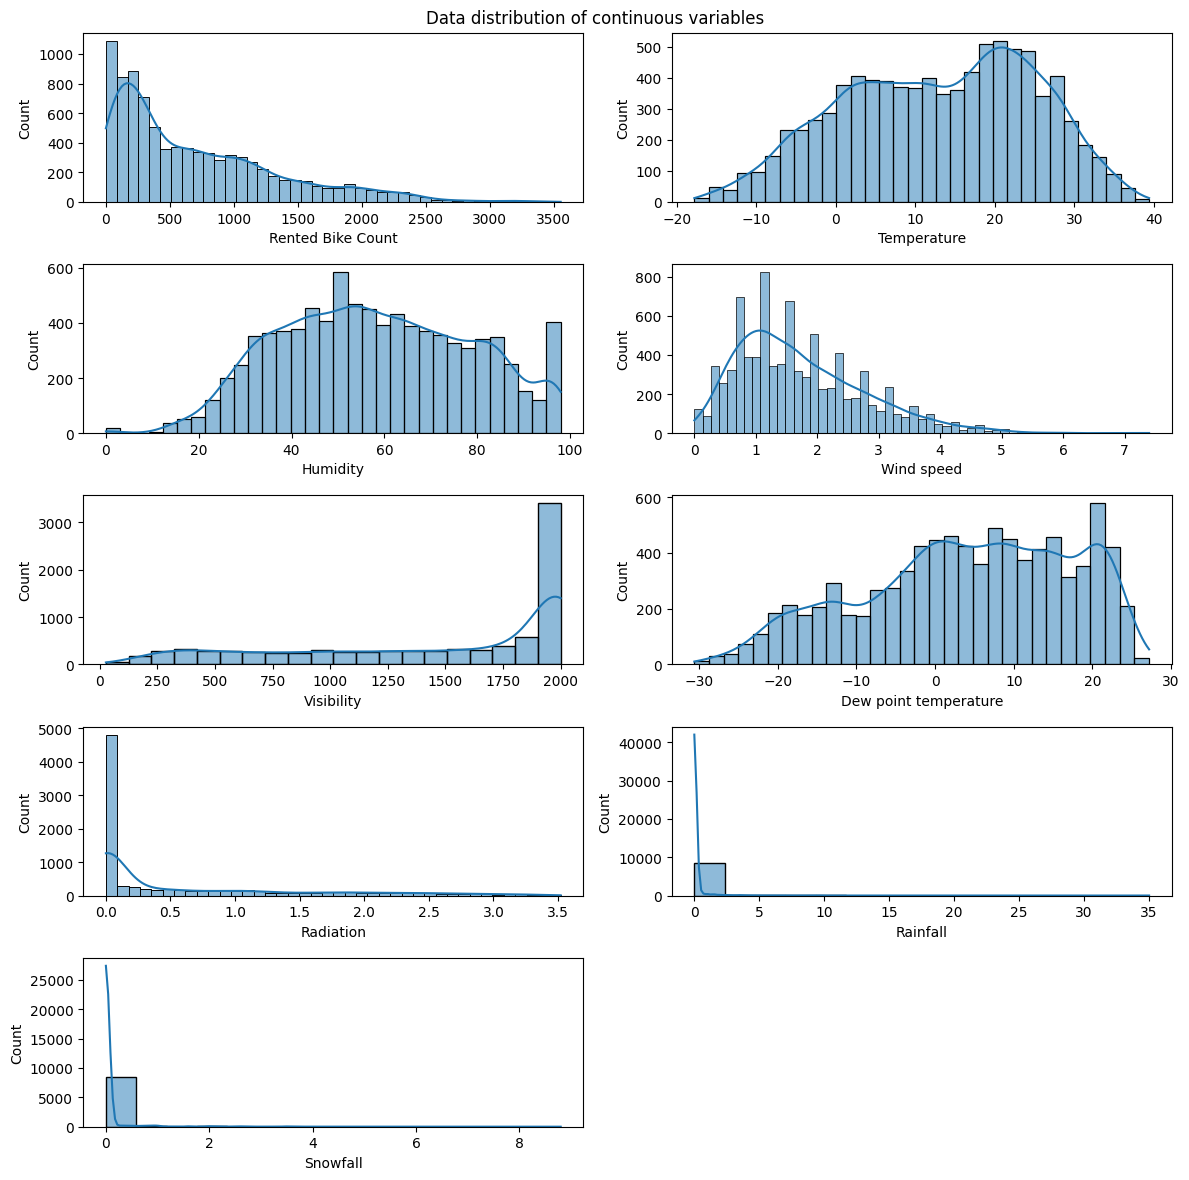

In [14]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    #plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=df, x=col, ax=ax,kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

From the above graph we can see that there are a lot of attributes which are positively or negatively distributed.

### Box Plot <a class="anchor" id="sec2.3"></a>

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Box Plot-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>What is Box Plot?</b><br>
    In descriptive statistics, a box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.</p><br>
    <p style="border:4px solid violet;color:teal;background-color:tan;">
        <b>How to interpret boxplot</b><br>
    *Median: In the box plot, the median is displayed rather than the mean.<br>
    * Q1: The first quartile (25%) position.<br>
  * Q3: The third quartile (75%) position.<br>
  *  Interquartile range (IQR): a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles. It represents how 50% of the points were dispersed.<br>
* Lower and upper 1.5*IQR whiskers: These represent the limits and boundaries for the outliers.<br>
  *  Outliers: Defined as observations that fall below Q1 − 1.5 IQR or above Q3 + 1.5 IQR. Outliers are displayed as dots or circles.

</p>
</html>

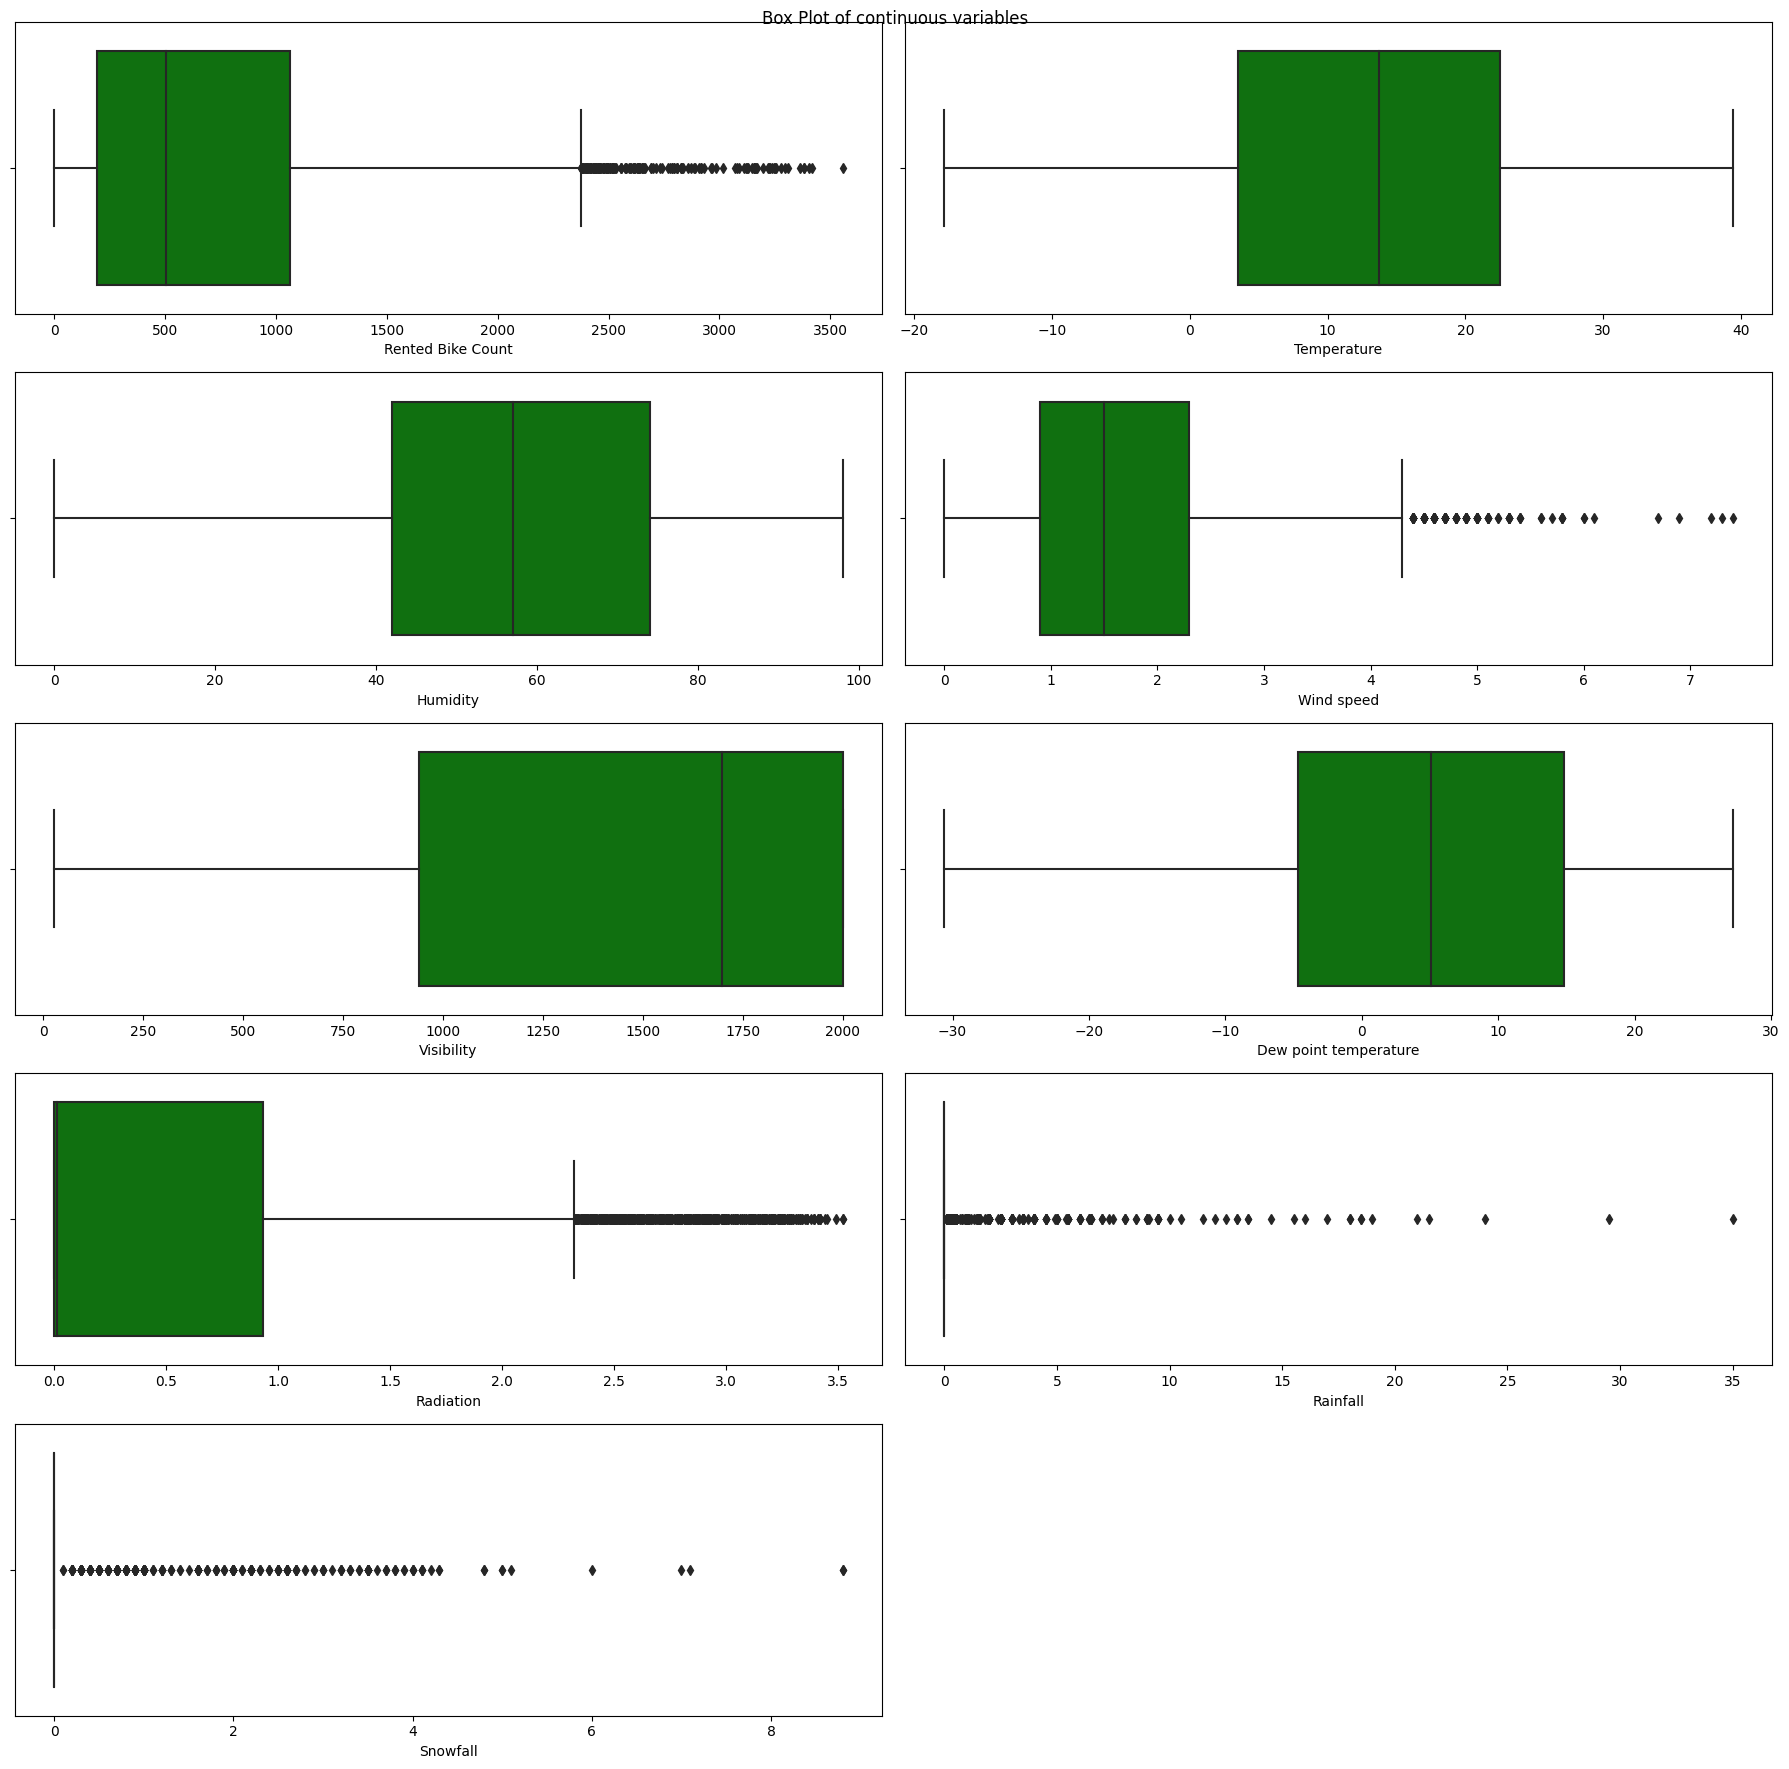

In [15]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    #plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='green')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

### Power Transformation

In [16]:
#selecting variables that have data types float and int.
var=list(df.select_dtypes(include=['float64','int64']).columns)

In [17]:
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
df[var]=sc_X.fit_transform(df[var])

### Data distribution after applying Power Transformer <a class="anchor" id="sec2.4"></a>

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">Now the Distribution plots look more symmetrical after applying Power Transformer.</p>
</html>

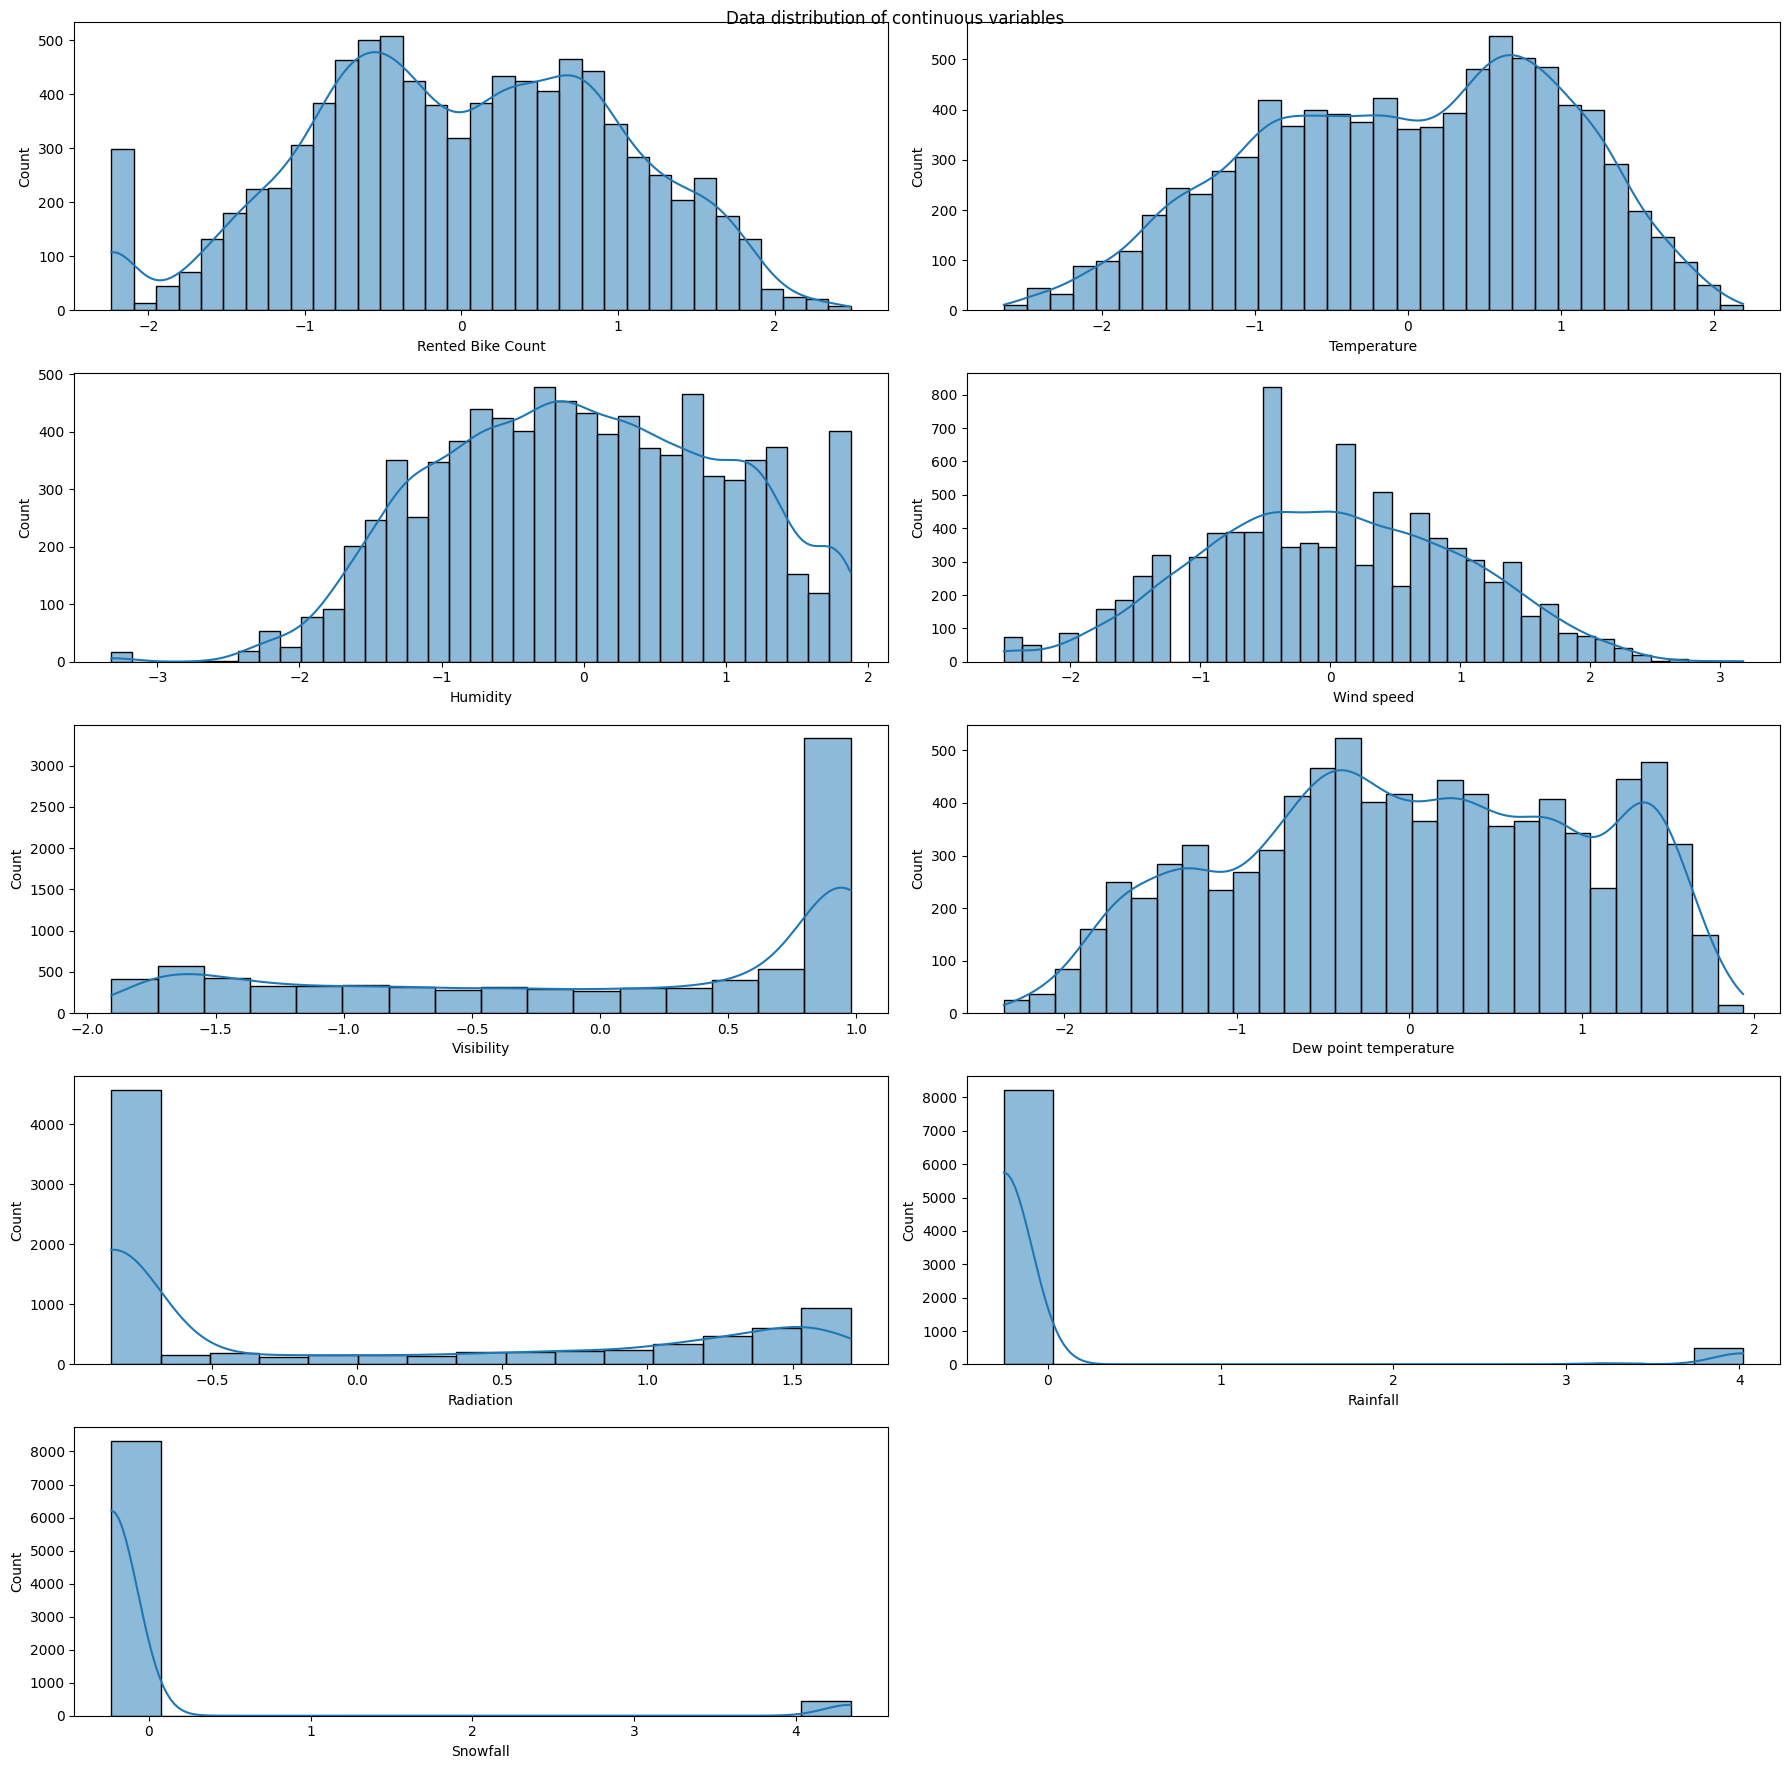

In [18]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    #plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=df, x=col, ax=ax,kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

### Box Plot after applyig Power Transformer <a class="anchor" id="sec2.5"></a>

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">Now our Box plots look better after treating the outliers.</p>
</html>

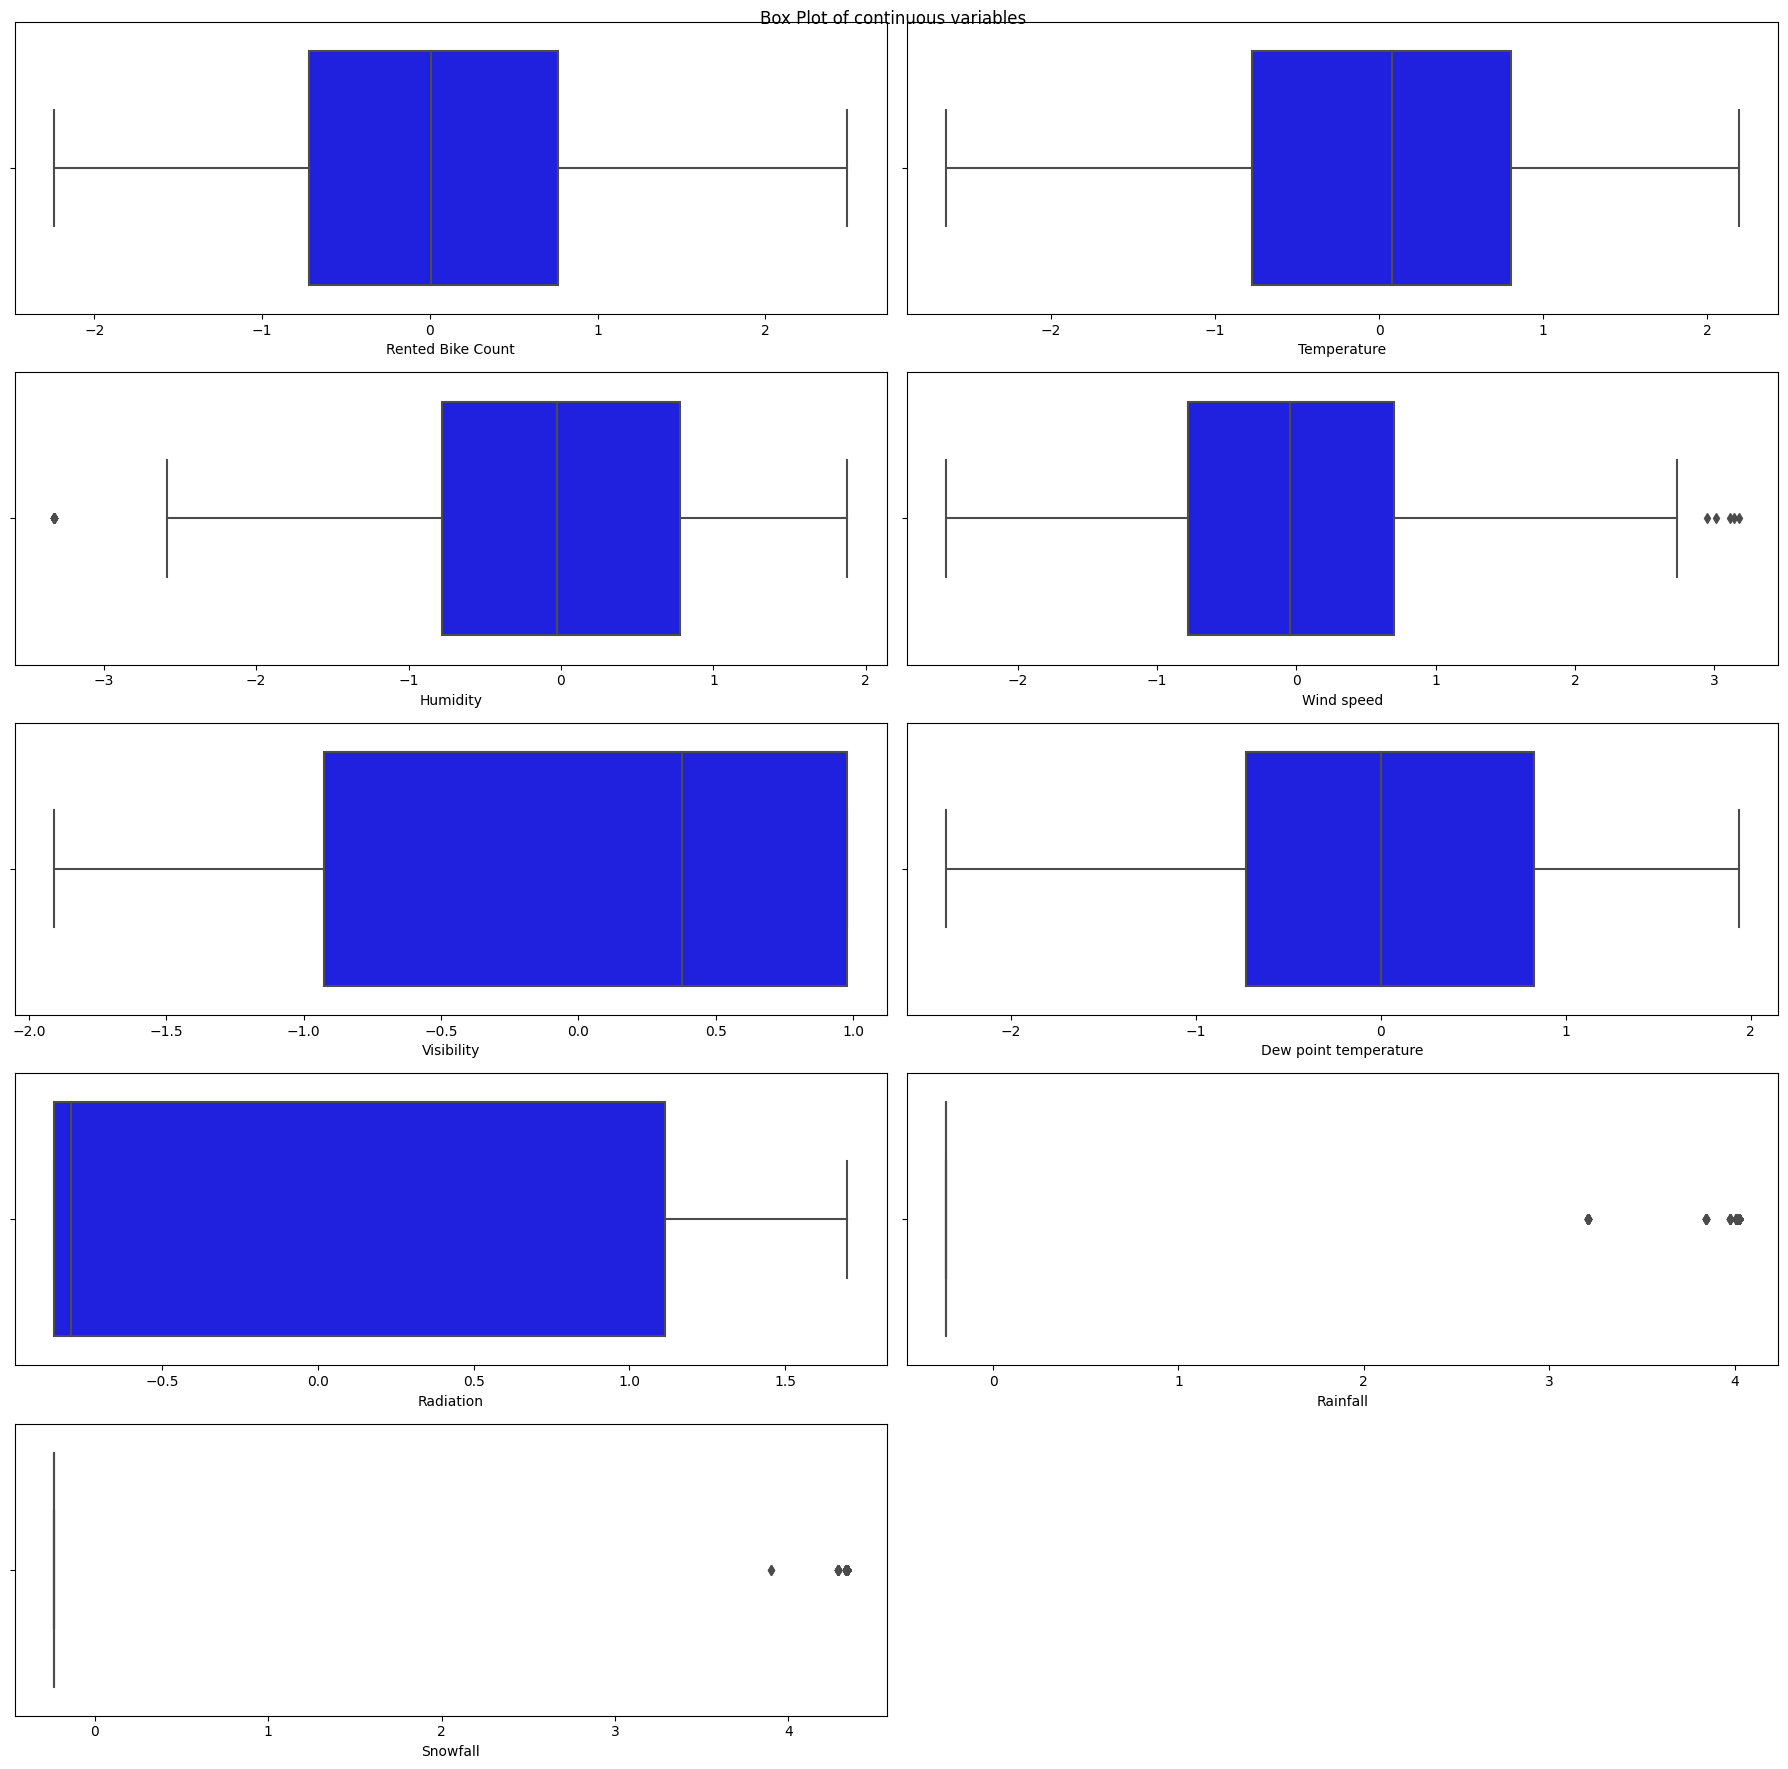

In [19]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    #plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

### Heatmap <a class="anchor" id="sec2.6"></a>

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Correlation Coefficient-</b></p>
  
  

<html>
<p style="border:4px solid violet;color:indigo;background-color:tan">With the above heatmap plot we can interpret which variable is how much correlated to other variable.</p>
</html>

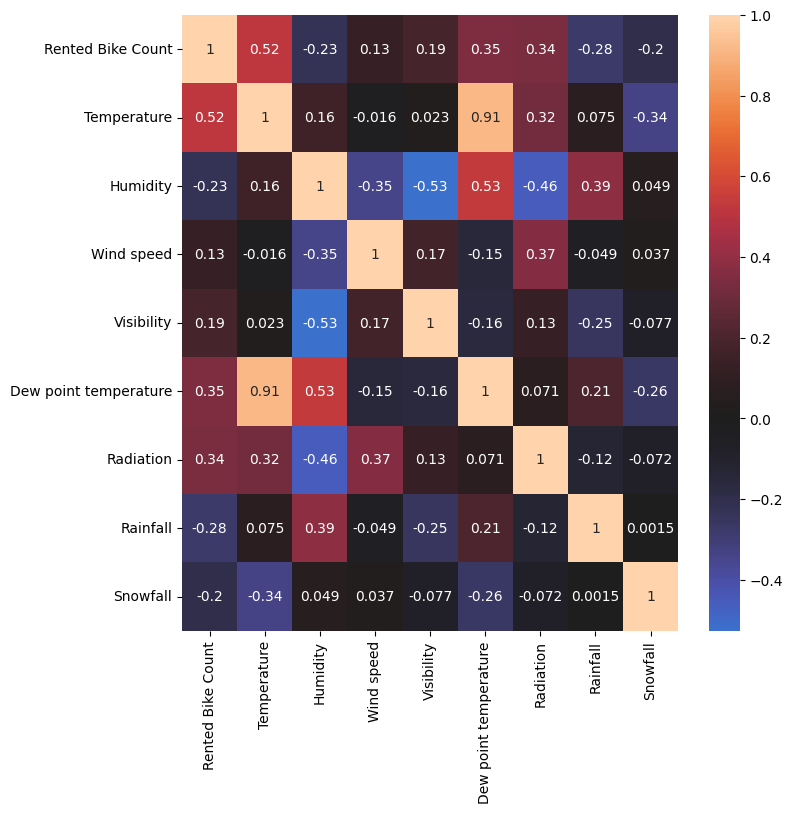

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(df.select_dtypes(include=['float']).corr(),annot=True,center = 0)
plt.show()

### Analysing Categorical Variable <a class="anchor" id="sec2.4"></a>

### Pie Chart .<a class="anchor" id="sec2.8"></a>

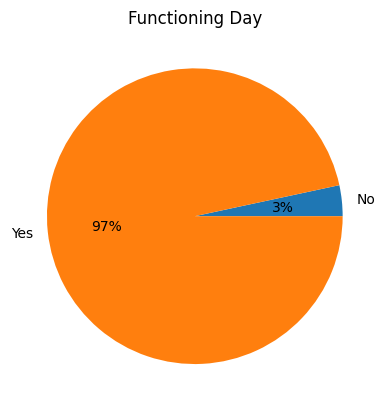

In [21]:
Functioning_Day_var=pd.crosstab(index=df['Functioning Day'],columns='% observations')
plt.pie(Functioning_Day_var['% observations'],labels=Functioning_Day_var['% observations'].index,autopct='%.0f%%')
plt.title('Functioning Day')
plt.show()

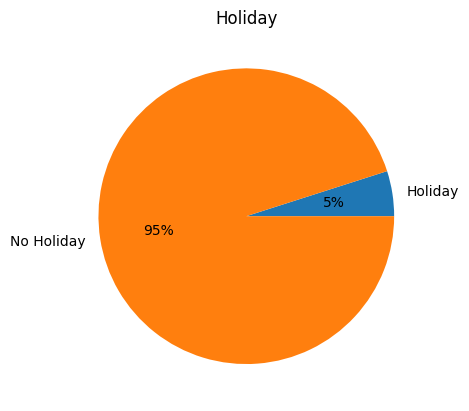

In [22]:
holiday_var=pd.crosstab(index=df['Holiday'],columns='% observations')
plt.pie(holiday_var['% observations'],labels=holiday_var['% observations'].index,autopct='%.0f%%')
plt.title('Holiday')
plt.show()

In [23]:
df=pd.get_dummies(df,columns=['Holiday','Seasons','Functioning Day','Hour'],drop_first=True)

In [24]:
X=df.iloc[:,2:]
y=df.iloc[:,1]

### Variance Inflation Factor <a class="anchor" id="sec8"></a>

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Variance Inflation Factor-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>What is VIF?</b><br>
    A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.<br>
    <b>A rule of thumb for interpreting the variance inflation factor:</b><br>
    --> 1 = not correlated.<br>
    --> Between 1 and 5 = moderately correlated.<br>
    --> Greater than 5 = highly correlated.
    </html>

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [26]:
calc_vif(X.select_dtypes(include=['float','int']))

,variables,VIF
0,Temperature,45.786458
1,Humidity,12.009217
2,Wind speed,1.232661
3,Visibility,1.559788
4,Dew point temperature,60.274115
5,Radiation,1.858131
6,Rainfall,1.195148
7,Snowfall,1.166736


In [27]:
#Dew Point Temperature is highly correlated .let's delete this variable and check the VIF score again.
del X['Dew point temperature']

In [28]:
calc_vif(X.select_dtypes(include=['float','int']))
#Each variable is within the range between 1 and 5.

,variables,VIF
0,Temperature,1.561902
1,Humidity,2.437890
2,Wind speed,1.232537
3,Visibility,1.496192
4,Radiation,1.827230
5,Rainfall,1.194817
6,Snowfall,1.162319


### Feature Selection <a class="anchor" id="sec3"></a>

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Feature Selection-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    Feature selection methods are intended to reduce the number of input variables to those that are believed to be most useful to a model in order to predict the target variable..</p>
<img src="https://lh6.googleusercontent.com/exNj6JGWZNAzyB8XXd1LM5FrgMGbfyV09Qgts5bPJA14O7-8AqATF9suuWqYo6oYhOk=w2400" alt="Computer man" style="width:800px;height:300px;"/>
 </html>

<html>
<p style="border:4px solid violet;color:green;background-color:tan;">
    In our dataset we have numerical Input variable and numerical Output variable.so we will use <b>Pearson's</b> for the feature selection.</p>

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#Correlation

In [30]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all', score_func=<function f_regression at 0x7949636ceef0>)

In [31]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100

### Feature importance Graph <a class="anchor" id="sec3.1"></a>

Temperature : 24.19%
Humidity : 3.52%
Wind speed : 1.16%
Visibility : 2.43%
Radiation : 8.55%
Rainfall : 5.65%
Snowfall : 2.65%
Holiday_No Holiday : 0.53%
Seasons_Spring : 0.07%
Seasons_Summer : 6.95%
Seasons_Winter : 13.04%
Functioning Day_Yes : 13.83%
Hour_1 : 0.27%
Hour_2 : 0.91%
Hour_3 : 1.95%
Hour_4 : 3.25%
Hour_5 : 3.11%
Hour_6 : 1.15%
Hour_7 : 0.02%
Hour_8 : 0.47%
Hour_9 : 0.00%
Hour_10 : 0.05%
Hour_11 : 0.00%
Hour_12 : 0.04%
Hour_13 : 0.08%
Hour_14 : 0.11%
Hour_15 : 0.21%
Hour_16 : 0.39%
Hour_17 : 0.93%
Hour_18 : 2.18%
Hour_19 : 0.97%
Hour_20 : 0.56%
Hour_21 : 0.49%
Hour_22 : 0.28%
Hour_23 : 0.00%


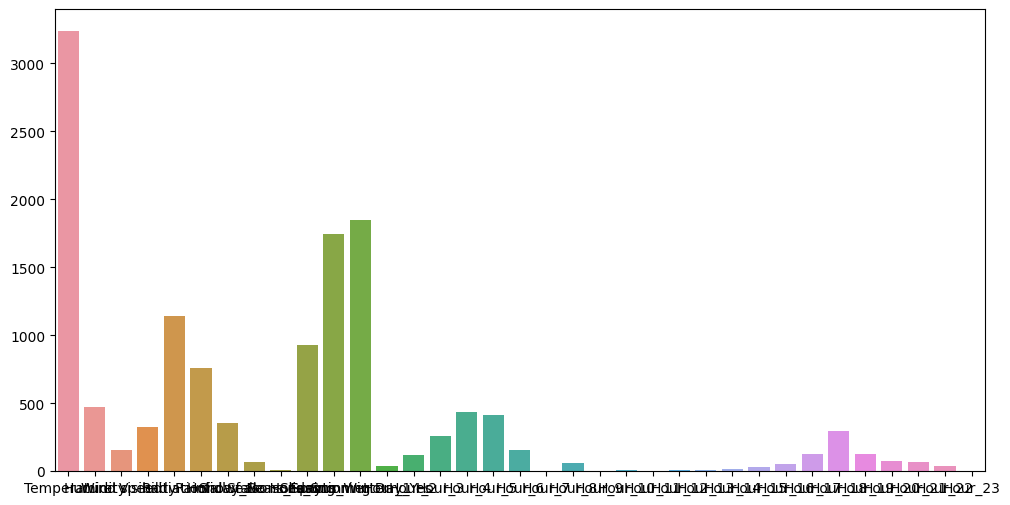

In [32]:
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(12,6))
sns.barplot(x=X.columns,y=fs.scores_)
plt.show()

<html>
<p style="border:4px solid violet;color:green;background-color:tan;">
    From the above bar garph we can see the feature importance and we will include only those features which are more important for our model.</p>
    </html>

### Splitting our dataset into train and test set <a class="anchor" id="sec4"></a>

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
#splitting our dataset in 80% training and 20% testset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

### Feature Scaling <a class="anchor" id="sec5"></a>

<html>
<p style="color:chocolate;font-size:150%;">
    <b>Feature Scaling-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>What is Normalization?</b><br>
    Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.<br>
    <b>What is Standardization?</b><br>
    Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.
       
       

<html>
<p style="border:4px solid violet;color:green;background-color:tan;">
    Here we are going to use <b>Standardization</b>.</p>
    </html>

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Modeling <a class="anchor" id="sec6"></a>

### Performance Measures for Regression

<html>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>R-Square:</b><br>
    <img src="https://vitalflux.com/wp-content/uploads/2019/07/R-squared-formula-linear-regression-model-640x271.jpg" alt="Computer man" style="width:400px;height:100px;"/>
    <br>
    <b>Mean Square Error:</b><br>
    <img src="https://cdn-media-1.freecodecamp.org/images/hmZydSW9YegiMVPWq2JBpOpai3CejzQpGkNG" alt="Computer man" style="width:400px;height:100px;"/>
    </p>
    </html>

### K-fold Cross Validation

<html>
<p style="color:chocolate;font-size:150%;">
    <b>K-fold Cross validation-</b></p>
<p style="border:4px solid violet;color:green;background-color:tan;">
    <b>What is Cross Validation?</b><br>
    Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.<br>
    <img src="https://lh6.googleusercontent.com/sp2oloxXrxErMlLFkU3p0TqWYUh4O-9OjhQxBk8RcbKyYrxfPSSfGqw4KU61Vw_Qq7A=w2400" alt="Computer man" style="width:800px;height:400px;"/>
    </html>

In [37]:
#importing different Regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

In [38]:
#creating dictionary for storing different models accuracy
model_comparison={}

### Linear Regression <a class="anchor" id="sec6.1"></a>

In [39]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 80.76%
Model MSE : 19.16%
Cross Val Accuracy: 80.35 %
Cross Val Standard Deviation: 0.59 %


#### Linear Regression Summary

In [40]:
import statsmodels.api as sm
lin_reg=sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              726.5
Date:                Fri, 29 Dec 2023   Prob (F-statistic):                        0.00
Time:                        14:37:31   Log-Likelihood:                         -3668.0
No. Observations:                6132   AIC:                                      7406.
Df Residuals:                    6097   BIC:                                      7641.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3607      0.013     27.283      0.000       0.335       0.387
x2            -0.1188      0.010    -12.492      0.000      -0.137      -0.100
x3            -0.0206      0.007     -3.046      0.002      -0.034      -0.007
x4             0.0084      0.007      1.157      0.247      -0.006       0.023
x5             0.2291      0.017     13.603      0.000       0.196       0.262
x6            -0.2603      0.006    -40.988      0.000      -0.273      -0.248
x7            -0.0006      0.006     -0.102      0.919      -0.013       0.012
x8             0.0513      0.006      8.986      0.000       0.040       0.063
x9            -0.1030      0.007    -13.836      0.000      -0.118      -0.088
x10           -0.0957      0.009    -10.381      0.000      -0.114      -0.078
x11           -0.2716      0.010    -25.983      0.000      -0.292      -0.251
x12            0.4646      0.006     79.193      0.000       0.453       0.476
x13           -0.0427      0.008     -5.447      0.000      -0.058      -0.027
x14           -0.0908      0.008    -11.508      0.000      -0.106      -0.075
x15           -0.1212      0.008    -15.453      0.000      -0.137      -0.106
x16           -0.1727      0.008    -22.168      0.000      -0.188      -0.157
x17           -0.1624      0.008    -20.873      0.000      -0.178      -0.147
x18           -0.0758      0.008     -9.681      0.000      -0.091      -0.060
x19            0.0035      0.008      0.438      0.661      -0.012       0.019
x20            0.0594      0.008      7.047      0.000       0.043       0.076
x21           -0.0377      0.009     -4.072      0.000      -0.056      -0.020
x22           -0.1138      0.010    -11.567      0.000      -0.133      -0.095
x23           -0.1130      0.010    -11.231      0.000      -0.133      -0.093
x24           -0.0958      0.010     -9.428      0.000      -0.116      -0.076
x25           -0.1002      0.010     -9.764      0.000      -0.120      -0.080
x26           -0.0995      0.010     -9.707      0.000      -0.120      -0.079
x27           -0.0798      0.010     -7.930      0.000      -0.100      -0.060
x28           -0.0477      0.010     -4.886      0.000      -0.067      -0.029
x29            0.0128      0.009      1.391      0.164      -0.005       0.031
x30            0.1193      0.008     14.495      0.000       0.103       0.135
x31            0.0908      0.008     11.289      0.000       0.075       0.107
x32            0.0832      0.008     10.710      0.000       0.068       0.098
x33            0.0975      0.008     12.277      0.000       0.082       0.113
x34            0.0698      0.008      8.942      0.000       0.055       0.085
x35            0.0129      0.008      1.675      0.094      -

#### Assumptions of linear regression

In [41]:
residuals = lin_reg.resid
fitted_value=lin_reg.fittedvalues

In [42]:
np.mean(residuals)

0.0106991770214442

#### Checking for normality of the residuals

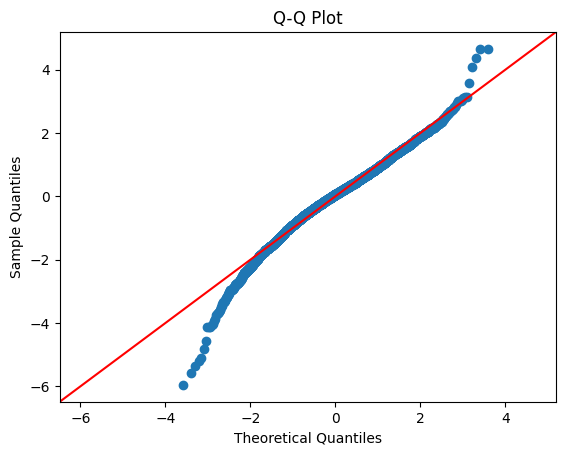

In [43]:
sm.qqplot(residuals,fit=True,line='45')
plt.title('Q-Q Plot')
plt.show()

#### Checking for homoscedasticity

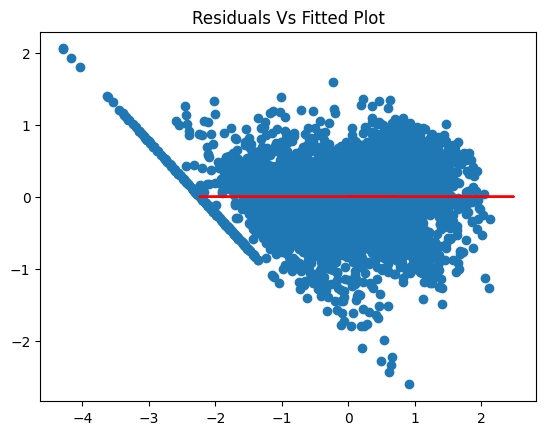

In [44]:
plt.scatter(fitted_value, residuals)
plt.plot(y_train, [0]*len(y_train),c='r')
plt.title('Residuals Vs Fitted Plot')
plt.show()

### Polynomial Regression <a class="anchor" id="sec6.2"></a>

In [45]:
poly_reg=PolynomialFeatures(degree=2)
model=LinearRegression()
model.fit(poly_reg.fit_transform(X_train),y_train)
y_pred=model.predict(poly_reg.fit_transform(X_test))
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Polynomial Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 88.66%
Model MSE : 11.29%
Cross Val Accuracy: 80.35 %
Cross Val Standard Deviation: 0.59 %


### Decision Tree Regression <a class="anchor" id="sec6.3"></a>

In [46]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Decision Tree Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 80.17%
Model MSE : 19.75%
Cross Val Accuracy: 78.79 %
Cross Val Standard Deviation: 1.61 %


### Random Forest Regression <a class="anchor" id="sec6.4"></a>

In [47]:
model=RandomForestRegressor(n_estimators=10,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Random forest Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 87.35%
Model MSE : 12.60%
Cross Val Accuracy: 88.24 %
Cross Val Standard Deviation: 0.65 %


### Bagging Regressor <a class="anchor" id="sec6.5"></a>

In [48]:
from sklearn.ensemble import BaggingRegressor
model= BaggingRegressor(RandomForestRegressor(n_estimators=10,random_state=0),random_state=0)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Bagging Regressor']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 88.41%
Model MSE : 11.54%
Cross Val Accuracy: 89.08 %
Cross Val Standard Deviation: 0.66 %


### Stacking Regressor <a class="anchor" id="sec6.6"></a>

In [49]:
estimators=[('linear regression',LinearRegression()),('Decision Tree',DecisionTreeRegressor()),('random forest',RandomForestRegressor(n_estimators=10,random_state=0)),('bagging',BaggingRegressor(RandomForestRegressor(n_estimators=10,random_state=0),random_state=0))]

In [50]:
model=StackingRegressor(estimators=estimators,final_estimator=LinearRegression(),passthrough=True)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Stacking Regressor']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 89.02%
Model MSE : 10.94%
Cross Val Accuracy: 89.73 %
Cross Val Standard Deviation: 0.57 %


### Model Comparison <a class="anchor" id="sec7"></a>

In [51]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['R-Square','MSE','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='R-Square',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='RdYlBu_r')

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,89.02%,10.94%,89.73%,0.57%
Polynomial Regression,88.66%,11.29%,80.35%,0.59%
Bagging Regressor,88.41%,11.54%,89.08%,0.66%
Random forest Regression,87.35%,12.60%,88.24%,0.65%
Linear Regression,80.76%,19.16%,80.35%,0.59%
Decision Tree Regression,80.17%,19.75%,78.79%,1.61%
